In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [34]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[0]
txt_dir = "../SHARCNET/Results/debug/ppo/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/debug/ppo/point125/SARA\2019-09-14-093517-0-1\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point125/SARA\2019-09-14-093517-1-0\ppo\ppo_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/debug/ppo/point125/PLA\2019-09-14-093517-0-0\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point125/PLA\2019-09-14-093517-1-0\ppo\ppo_s0\progress.txt


In [35]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
        
    metrics = ["AverageEpRet", "AverageVVals"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        if metric == "AverageEpRet":
            col_name = "return"
        else:
            col_name = "V_means"
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [37]:
all_combined_data['PLA']

,return_run0,return_run1,return_avg,return_std,V_means_run0,V_means_run1,V_means_avg,V_means_std
0,0.681492,0.681492,0.681492,1.359740e-16,0.001447,0.001447,0.001447,0.000000e+00
1,0.649310,0.649310,0.649310,0.000000e+00,0.097664,0.097664,0.097664,1.699675e-17
2,2.457492,2.457492,2.457492,0.000000e+00,0.224931,0.224931,0.224931,0.000000e+00
3,1.975594,1.975594,1.975594,0.000000e+00,0.393018,0.393018,0.393018,0.000000e+00
4,0.623689,0.623689,0.623689,0.000000e+00,0.580663,0.580663,0.580663,0.000000e+00
5,3.289866,3.289866,3.289866,0.000000e+00,0.850130,0.850130,0.850130,1.359740e-16
6,0.708404,0.708404,0.708404,0.000000e+00,1.120558,1.120558,1.120558,0.000000e+00
7,0.000000,0.000000,0.000000,0.000000e+00,1.447223,1.447223,1.447223,0.000000e+00
8,1.347120,1.347120,1.347120,0.000000e+00,1.687442,1.687442,1.687442,0.000000e+00
9,3.382688,3.382688,3.382688,0.000000e+00,2.078298,2.078298,2.078298,0.000000e+00


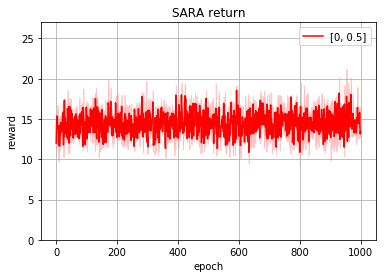

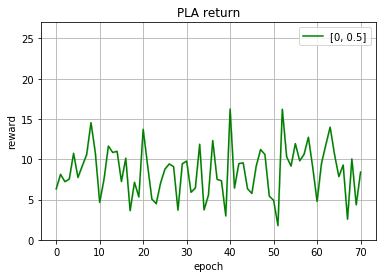

In [33]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/ppo/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')


### 2. V_mean

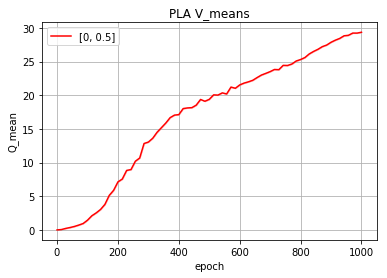

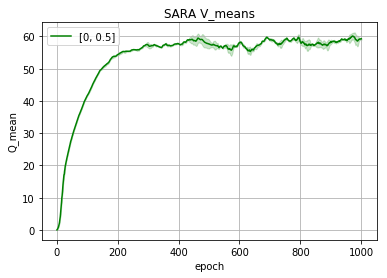

In [21]:
colors = ['r','g','b']
metric = "V_means"
modes = ["PLA","SARA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/ppo/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    